In [100]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
from pathlib import Path
import os

notebook_dir = Path().resolve()
os.chdir(notebook_dir)

In [102]:
from data_loading import standardise_month_jsons
standardise_month_jsons()

Written: C:\Users\jamed\Documents\EVEN_TASK\WasteOilTask\data\AUGUST_standardised.json
Written: C:\Users\jamed\Documents\EVEN_TASK\WasteOilTask\data\OCTOBER_standardised.json
Written: C:\Users\jamed\Documents\EVEN_TASK\WasteOilTask\data\NOVEMBER_standardised.json


In [103]:
from data_loading import load_month_data, generate_derived_features
import pandas as pd
data = load_month_data()
data_derived = generate_derived_features(data)

In [104]:
def print_col_stats(df, col):
    print(f"Column: {col}")
    print(f"Data type: {df[col].dtype}")
    print(f"Missing values: {df[col].isnull().sum()}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"\nValue counts:\n{df[col].value_counts()}\n\n\n\n")

In [105]:
print_col_stats(data_derived, "recovery_ratio")
print_col_stats(data_derived, "supplier")

Column: recovery_ratio
Data type: float64
Missing values: 0
Unique values: 452

Value counts:
recovery_ratio
0.750000    11
0.738095     8
0.714286     7
0.692308     7
0.717949     7
            ..
0.620253     1
0.584416     1
0.541667     1
0.608333     1
0.645570     1
Name: count, Length: 452, dtype: int64




Column: supplier
Data type: object
Missing values: 0
Unique values: 7

Value counts:
supplier
Tom Hanks        126
Dick Tracey      119
Harry Houdini    115
Mary Therese      61
Mary Jane         59
Mary Anne         52
Mary              46
Name: count, dtype: int64






In [106]:
data_derived['supplier']

time_start_index
2022-08-01 08:29:00    Harry Houdini
2022-08-01 09:27:00      Dick Tracey
2022-08-01 11:38:00    Harry Houdini
2022-08-01 12:40:00        Tom Hanks
2022-08-01 14:25:00      Dick Tracey
                           ...      
2022-11-30 11:27:00        Mary Anne
2022-11-30 12:25:00             Mary
2022-11-30 13:30:00        Tom Hanks
2022-11-30 14:28:00     Mary Therese
2022-11-30 15:50:00        Tom Hanks
Name: supplier, Length: 578, dtype: object

In [107]:
from visualisation import generate_plots, scatter_coloured, density_scatter, display_simple_model_with_lgbm_and_density_scatter
#generate_plots(data_derived)

In [108]:
data_derived_without_supplied_m3 = data_derived.drop(columns=["supplied_m3"], inplace=False)

In [109]:
interesting_combinations_no_supplied_target_recover_m3 = [
    ("process_time_mins", "start_hour", "recovery_ratio"),
    ("start_day_week", "process_time_mins", "recovery_ratio"),
    ("supplier", "start_hour", "recovery_ratio"),
    ("facility", "start_hour", "recovery_ratio"),
    ("month", "start_day_week", "recovery_ratio"),
    ("supplier", "facility", "recovery_ratio"),
    ("facility", "process_time_mins", "recovery_ratio"),
]

interesting_combinations_with_supplied_m3 = [
    ("supplier", "supplied_m3", "recovery_ratio"),
    ("supplier", "recovery_ratio", "supplied_m3"),
    ("supplied_m3", "recovery_ratio", "supplier"),
]


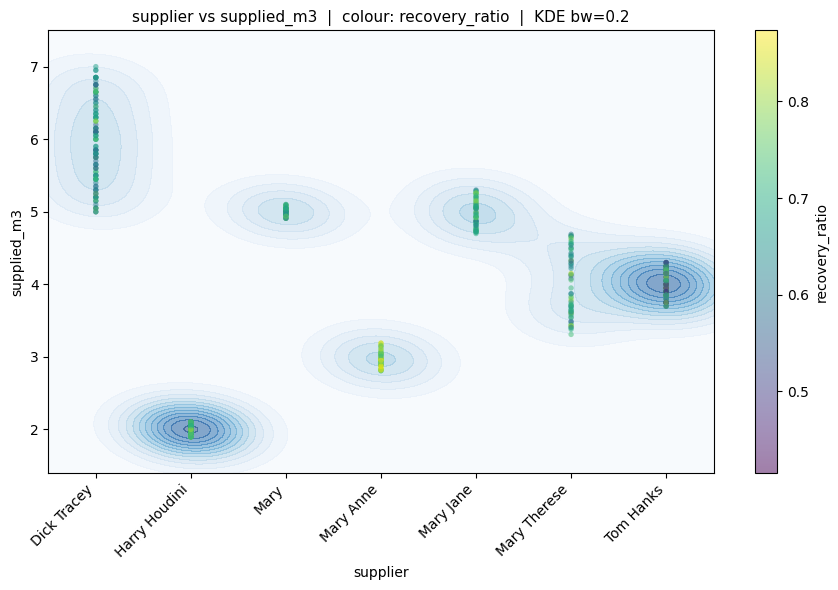

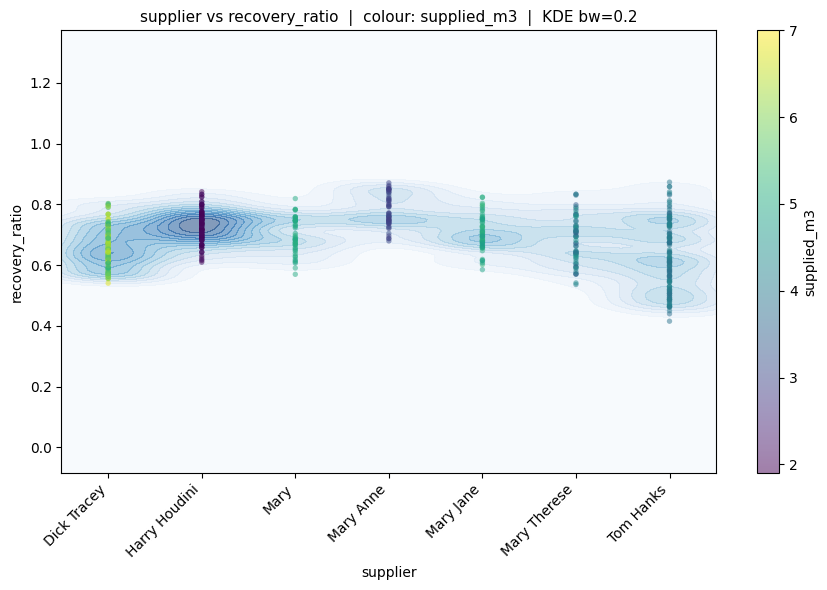

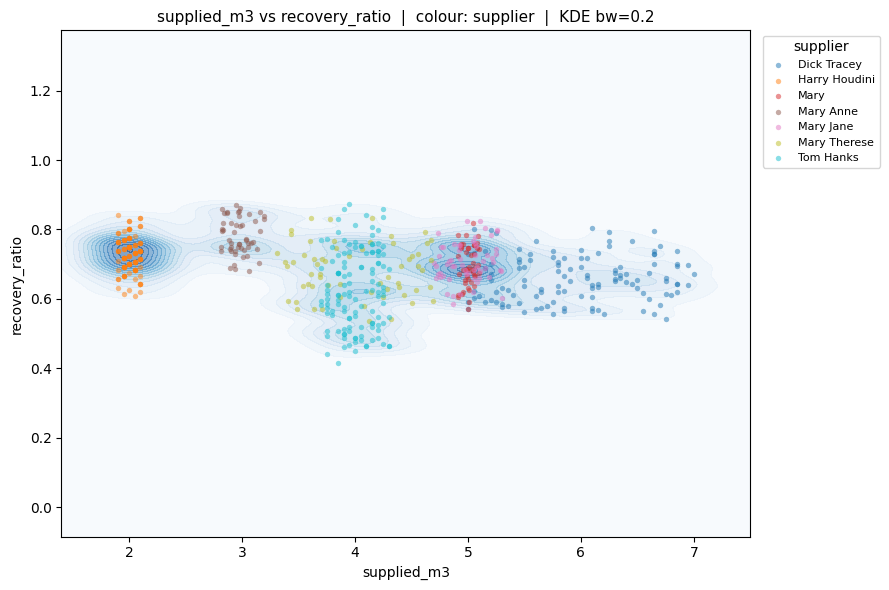

In [110]:
for x_col, y_col, target in interesting_combinations_with_supplied_m3:
    density_scatter(data_derived, x_col, y_col, target, bw = 0.2, alpha=0.5)

In [111]:
from statistical_comparision import compare_all_cols_to_target_visualise, compare_all_cols_to_target, analyze_condition_impact, compare_two_conditions, print_impact_summary, compare_two_columns, visualise_impact_summary


In [112]:
results = analyze_condition_impact(data_derived, "supplier", "Mary")
#print_impact_summary(results)

results = compare_two_conditions(data_derived, "supplier", "Mary", "Mary Anne")
print_impact_summary(results, alpha=0.9)

SIGNIFICANT FINDINGS (p < 0.9): 8/10

Column: supplied_m3
  Test: mann_whitney_u, p-value: 0.0000000000
  Effect size: 1.000 (large)
  Suggested viz: boxplot

Column: recovered_m3
  Test: mann_whitney_u, p-value: 0.0000000000
  Effect size: 1.000 (large)
  Suggested viz: boxplot

Column: recovery_ratio
  Test: mann_whitney_u, p-value: 0.0000000027
  Effect size: -0.699 (large)
  Suggested viz: boxplot

Column: process_time_mins
  Test: mann_whitney_u, p-value: 0.0000001698
  Effect size: 0.614 (large)
  Suggested viz: boxplot

Column: time_start_hour_minute
  Test: mann_whitney_u, p-value: 0.2986295677
  Effect size: -0.122 (small)
  Suggested viz: boxplot

Column: time_end
  Test: chi_square, p-value: 0.4524803890
  Effect size: 1.000 (large)
  Suggested viz: stacked_bar

Column: time_start
  Test: mann_whitney_u, p-value: 0.8170403006
  Effect size: -0.028 (small)
  Suggested viz: boxplot

Column: date
  Test: chi_square, p-value: 0.8234094029
  Effect size: 0.637 (large)
  Suggested

ALL FINDINGS: 1 columns analyzed

Column: N/A
  Test: spearman_correlation, p-value: 0.0000000000
  Effect size: -0.290 (small)
  Suggested viz: scatter



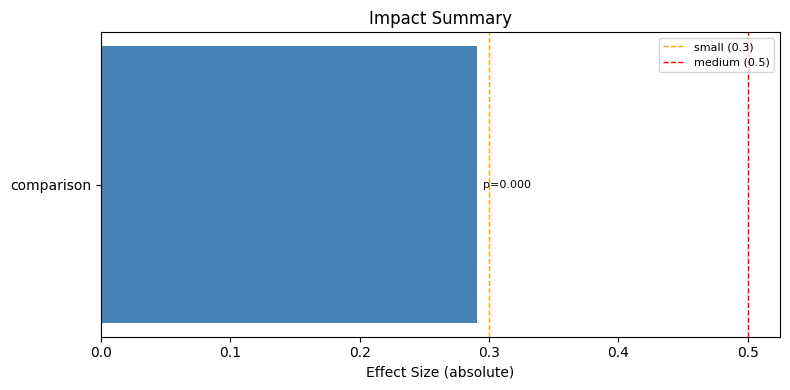

In [113]:
results = compare_two_columns(data_derived, "supplied_m3", "recovery_ratio")
print_impact_summary(results)
visualise_impact_summary(results)

SIGNIFICANT FINDINGS (p < 0.1): 7/11

Column: facility
  Test: kruskal_wallis, p-value: 0.0000000660
  Effect size: 0.049 (small)
  Suggested viz: nan

Column: time_start
  Test: spearman_correlation, p-value: 0.0050387461
  Effect size: 0.117 (small)
  Suggested viz: scatter

Column: process_time_mins
  Test: spearman_correlation, p-value: 0.0000000000
  Effect size: -0.282 (small)
  Suggested viz: scatter

Column: supplier
  Test: kruskal_wallis, p-value: 0.0000000000
  Effect size: 0.250 (small)
  Suggested viz: nan

Column: supplied_m3
  Test: spearman_correlation, p-value: 0.0000000000
  Effect size: -0.290 (small)
  Suggested viz: scatter

Column: month
  Test: kruskal_wallis, p-value: 0.0050092727
  Effect size: 0.015 (small)
  Suggested viz: nan

Column: time_start_hour_minute
  Test: spearman_correlation, p-value: 0.0000000000
  Effect size: -0.467 (medium)
  Suggested viz: scatter



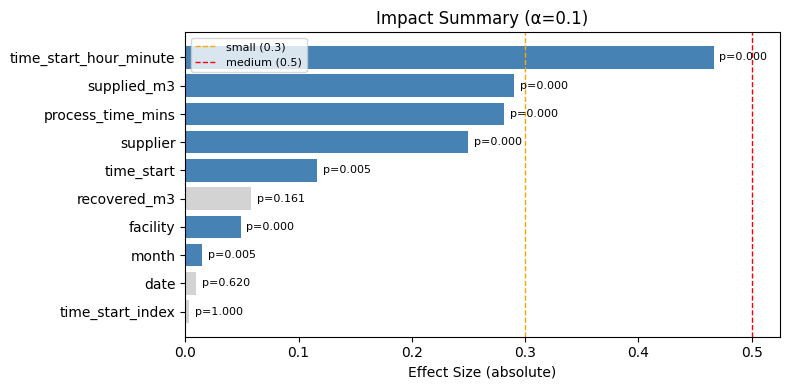

In [114]:
compare_all_cols_to_target_visualise(data_derived, "recovery_ratio")

SIGNIFICANT FINDINGS (p < 0.1): 5/11

Column: date
  Test: kruskal_wallis, p-value: 0.0460072802
  Effect size: 0.209 (small)
  Suggested viz: nan

Column: time_start
  Test: spearman_correlation, p-value: 0.0031708020
  Effect size: 0.402 (medium)
  Suggested viz: scatter

Column: recovered_m3
  Test: spearman_correlation, p-value: 0.0000000000
  Effect size: 0.894 (large)
  Suggested viz: scatter

Column: month
  Test: kruskal_wallis, p-value: 0.0530409556
  Effect size: 0.055 (small)
  Suggested viz: nan

Column: time_start_hour_minute
  Test: spearman_correlation, p-value: 0.0000000000
  Effect size: -0.805 (large)
  Suggested viz: scatter



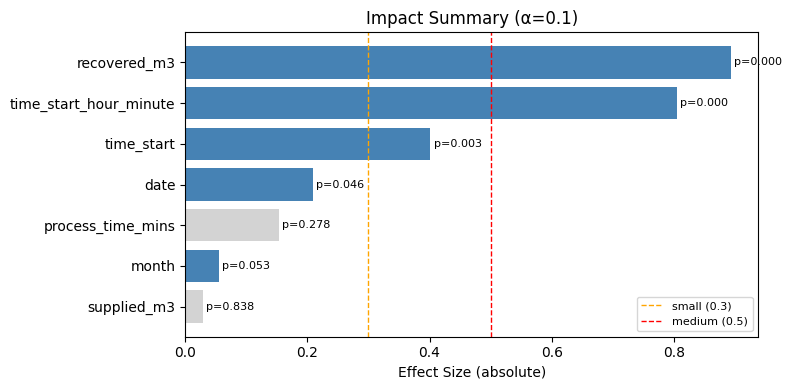

In [ ]:
data_derived_specific_supplier = data_derived[data_derived["supplier"] == "Mary Anne"].copy()
compare_all_cols_to_target_visualise(data_derived_specific_supplier, "recovery_ratio")

--- LightGBM: time_start_hour_minute, facility  →  recovery_ratio ---


c:\Users\jamed\miniconda3\envs\quick_model_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


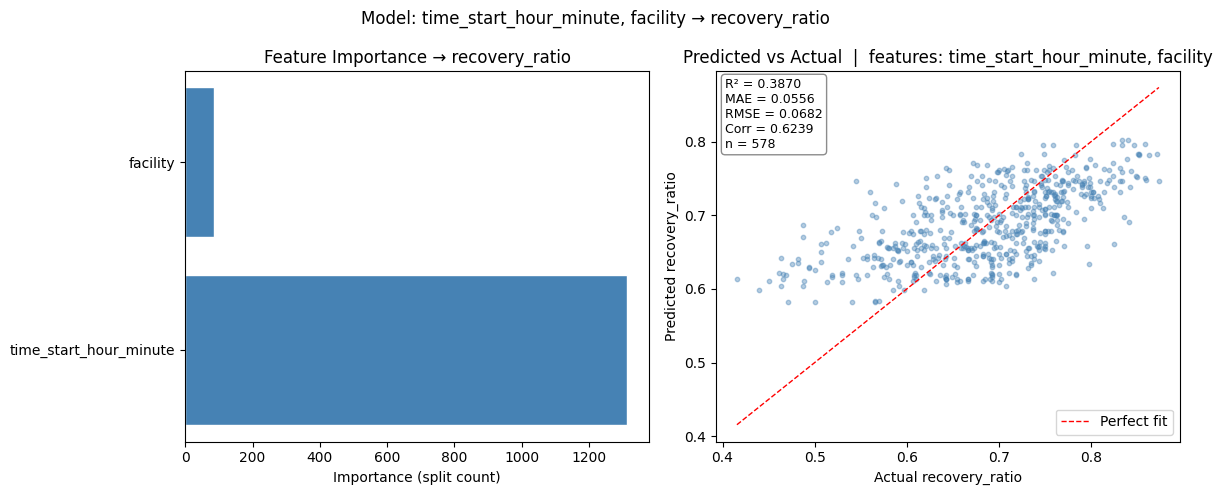

--- Density scatter: time_start_hour_minute vs recovery_ratio, colour=facility ---


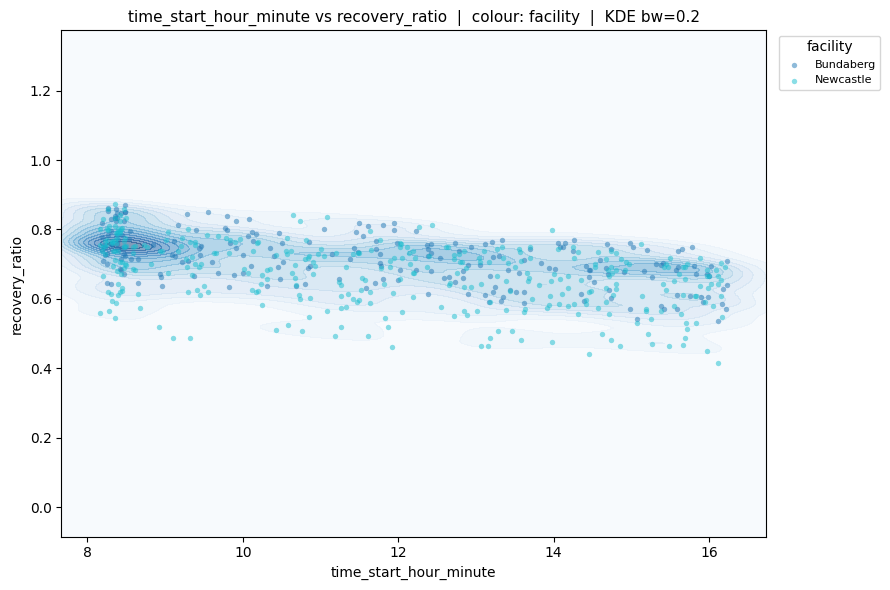

In [116]:
display_simple_model_with_lgbm_and_density_scatter(data_derived, "time_start_hour_minute", "facility", "recovery_ratio", bw = 0.2, alpha=0.5)